Importing the Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data collection


In [3]:
1 # loading a dataset to Pandas DataFrame
wine_dataset   = pd.read_csv('/content/winequality-red.csv')

In [4]:
1 #number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [5]:
1 # first 5 rows of the dataset
print( wine_dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
1 # checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

DataAnalysis and Visulaization


In [7]:
1 # statistical measures of the dataset
print( wine_dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

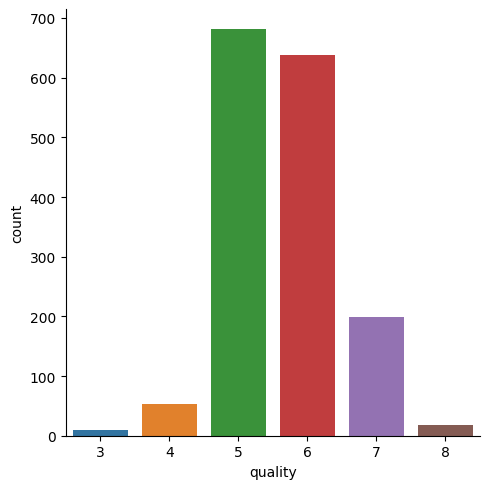

In [8]:
1 # number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

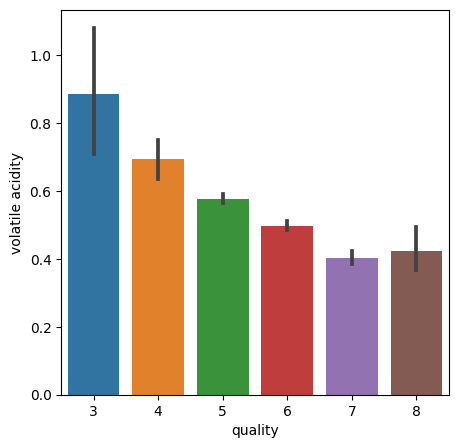

In [53]:
 # volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

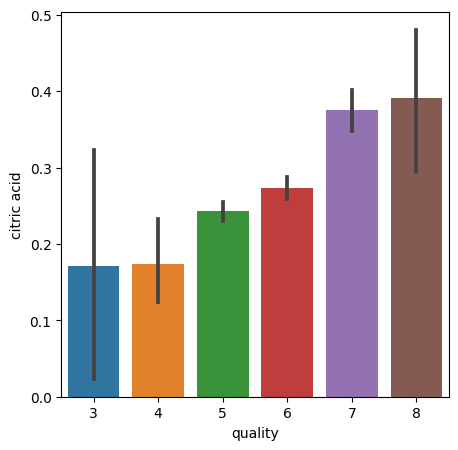

In [10]:
 # citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset)

Correlation




1.   Positive Correlation
2.   Negative Correlation




In [11]:
 correlation = wine_dataset.corr()


<Axes: >

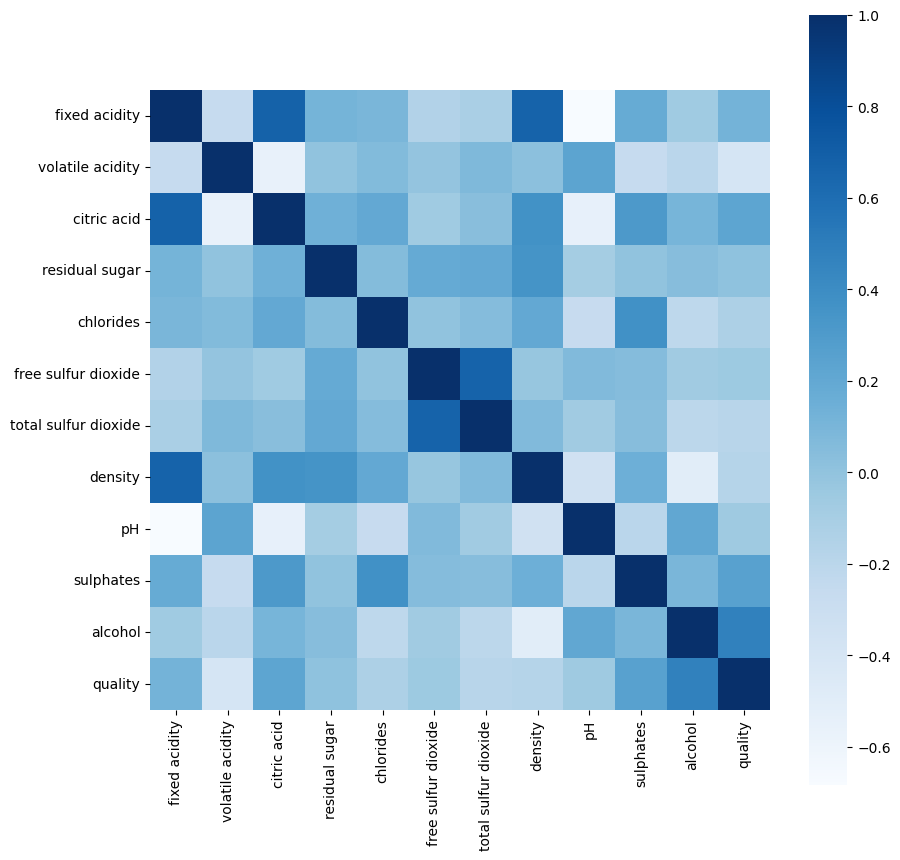

In [12]:
1 # constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt ='.1f', annot_kws={'size':8}, cmap = 'Blues')

Data Preprocesing


In [13]:
1 # seperate the data and Lable
x = wine_dataset.drop('quality',axis = 1)

In [14]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Lable Binarisation


In [15]:
 y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value<=7 else 0)

In [16]:
 print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int64


In [17]:
x_train, X_test,Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [50]:
print(y.shape,Y_train.shape, Y_test.shape)


(1599,) (1279,) (320,)


Modal Training

   Random Forest Clasifier




In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(x_train,Y_train)

RandomForestClassifier()



*   Model Evalutation
*   Accuracy Score



In [26]:
1 # accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy :' , test_data_accuracy)

Accuracy : 0.99375


Building a Predictive System

In [38]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

1 # changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
2 # reshape the data as we predicting the lable for only one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==1):
  print('g\Good Quality Wine')
else:
    print('Bad Quality Wine')




[1]
g\Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
